# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
!pip install holidays
import holidays


# Gathering data

In [2]:
Hourly_Weather_df = pd.read_csv('CBS_2021-2023_Hourly_Weather.csv') 
Hourly_Weather_df.head()


,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


# Data Wrangling
Check the shape of datasets and column names (make changes where required). 
Handle missing values. 
Is any data types conversion required? 

shape of datasets

In [3]:
print(Hourly_Weather_df.shape)

(26280, 9)


In [4]:
Hourly_Weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26280 non-null  object 
 2   Hour                     26280 non-null  int64  
 3   Member                   26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26280 non-null  int64  
 6   temperature_2m (°C)      26280 non-null  float64
 7   weathercode (wmo code)   26280 non-null  int64  
 8   windspeed_10m (km/h)     26280 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


Identify Missing Values

In [5]:
Hourly_Weather_df.isnull().sum()

Casual                     11
Date                        0
Hour                        0
Member                     11
Total_rides                11
relativehumidity_2m (%)     0
temperature_2m (°C)         0
weathercode (wmo code)      0
windspeed_10m (km/h)        0
dtype: int64

Drop rows with missing values

In [6]:
Hourly_Weather_df.dropna(inplace=True)
Hourly_Weather_df

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7


Duplicates

In [7]:
duplicate_rows = Hourly_Weather_df.duplicated().shape
print(duplicate_rows)

(26269,)


Dataframe description

In [8]:
Hourly_Weather_df.describe()

,Casual,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
count,26269.000000,26269.000000,26269.000000,26269.000000,26269.000000,26269.000000,26269.000000,26269.000000
mean,159.930070,11.503864,247.165632,407.095702,62.962846,14.419590,7.223838,10.170330
std,167.330426,6.921180,225.283539,373.005409,22.726160,10.282328,17.623401,5.260753
min,0.000000,0.000000,0.000000,1.000000,5.000000,-14.600000,0.000000,0.000000
25%,28.000000,6.000000,55.000000,85.000000,46.000000,6.200000,0.000000,6.500000
50%,105.000000,12.000000,203.000000,319.000000,64.000000,14.800000,1.000000,9.200000
75%,237.000000,18.000000,371.000000,616.000000,82.000000,22.700000,2.000000,12.900000
max,1206.000000,23.000000,1534.000000,2262.000000,100.000000,41.500000,75.000000,40.100000


Type conversion: Date

In [9]:
Hourly_Weather_df["Date"] = pd.to_datetime(Hourly_Weather_df["Date"])
Hourly_Weather_df.dtypes

Casual                            float64
Date                       datetime64[ns]
Hour                                int64
Member                            float64
Total_rides                       float64
relativehumidity_2m (%)             int64
temperature_2m (°C)               float64
weathercode (wmo code)              int64
windspeed_10m (km/h)              float64
dtype: object

# Create new features

Create a new feature: "Season":
Winter 12-02
Spring 03-05
Fall 09-11
Summer 06-08

In [10]:
# Ensure the 'Date' column is datetime
Hourly_Weather_df['Date'] = pd.to_datetime(Hourly_Weather_df['Date'], format="%Y-%m-%d")

# Function to map months to seasons
def get_season(row):
    if row['Date'].year in [2021, 2022, 2023]:  # correct year range
        month = row['Date'].month
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        elif month in [9, 10, 11]:
            return 'Fall'
    else:
        return 'Unknown'  # optional: handle years outside 2021–2023

# Apply the function to create a new column
Hourly_Weather_df['Season'] = Hourly_Weather_df.apply(get_season, axis=1)

# Convert to categorical with ordered categories
Hourly_Weather_df['Season'] = pd.Categorical(
    Hourly_Weather_df['Season'],
    categories=['Winter', 'Spring', 'Summer', 'Fall'],
    ordered=True
)

Hourly_Weather_df


,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),Season
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,Winter
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,Winter
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,Winter
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,Winter
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,Winter
...,...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3,Winter
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7,Winter
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0,Winter
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7,Winter


Create a new feature: "Days_Off"

In [11]:
# Ensure 'Date' column is datetime
Hourly_Weather_df['Date'] = pd.to_datetime(Hourly_Weather_df['Date'])

# Define your country's holidays – here for the US (customize if needed)
us_holidays = holidays.US(years=[2021, 2022, 2023])

Hourly_Weather_df['Days_Off'] = (
    Hourly_Weather_df['Date'].dt.date.isin(us_holidays) |
    (Hourly_Weather_df['Date'].dt.weekday >= 5)
)
Hourly_Weather_df['Days_Off'] = Hourly_Weather_df['Days_Off'].map({True: "Yes", False: "No"})

Hourly_Weather_df

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),Season,Days_Off
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,Winter,Yes
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,Winter,Yes
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,Winter,Yes
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,Winter,Yes
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,Winter,Yes
...,...,...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3,Winter,Yes
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7,Winter,Yes
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0,Winter,Yes
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7,Winter,Yes


In [12]:
unique_values_after = Hourly_Weather_df.nunique()
print("Unique values after conversion:\n", unique_values_after, '\n')

Unique values after conversion:
 Casual                      835
Date                       1095
Hour                         24
Member                     1159
Total_rides                1670
relativehumidity_2m (%)      96
temperature_2m (°C)         532
weathercode (wmo code)       13
windspeed_10m (km/h)        332
Season                        4
Days_Off                      2
dtype: int64 



# Plot Bike Ride vs. Weather

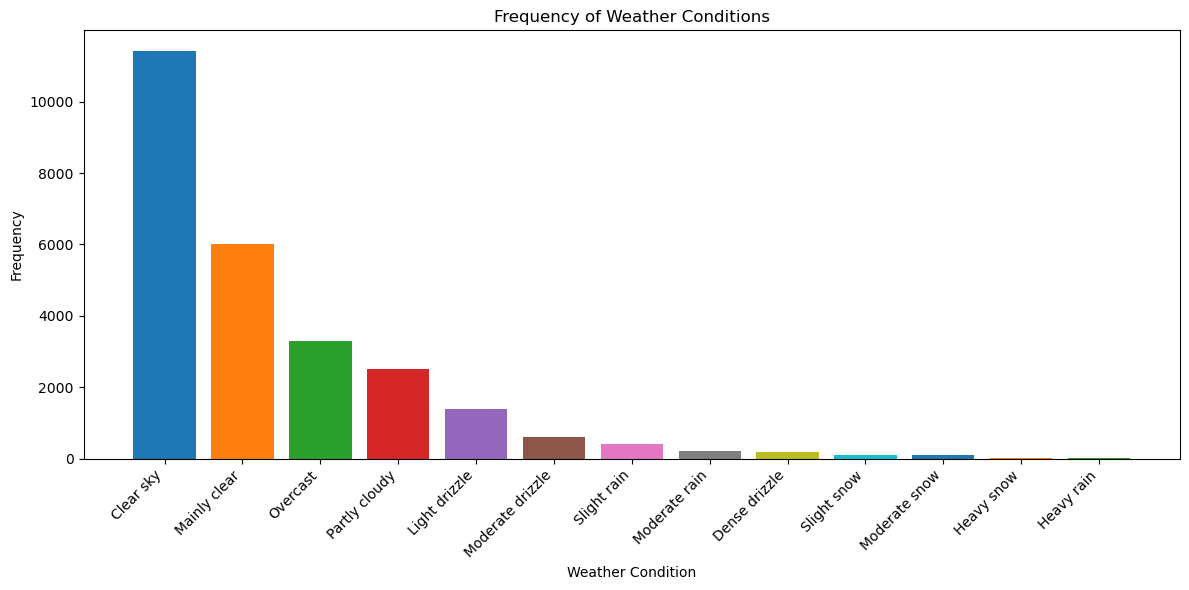

In [13]:
# WMO code to description mapping
wmo_code_map = {
    0: "Clear sky",
    1: "Mainly clear",
    2: "Partly cloudy",
    3: "Overcast",
    45: "Fog",
    48: "Rime fog",
    51: "Light drizzle",
    53: "Moderate drizzle",
    55: "Dense drizzle",
    61: "Slight rain",
    63: "Moderate rain",
    65: "Heavy rain",
    71: "Slight snow",
    73: "Moderate snow",
    75: "Heavy snow",
    95: "Thunderstorm",
    96: "Storm with slight hail",
    99: "Storm with heavy hail"
}

# Count occurrences
data = Hourly_Weather_df['weathercode (wmo code)'].value_counts()

# Map index to descriptions
labels = [wmo_code_map.get(code, f"Unknown ({code})") for code in data.index]

colors = plt.cm.tab10.colors
color_cycle = [colors[i % len(colors)] for i in range(len(data))]

# Plot as bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels, data.values, color=color_cycle)
plt.xlabel("Weather Condition")
plt.ylabel("Frequency")
plt.title("Frequency of Weather Conditions")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
